# NetworkX

[NetworkX](https://networkx.github.io/) is an open source Python library for working with graphs and digraphs.  It can solve many of the kinds of computational problems on graphs which you will learn algorithms for in the second part of this course.

In [42]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

## Creating graphs

Graphs correspond to `Graph` objects.  They can be easily built up by adding nodes and edges one at a time:

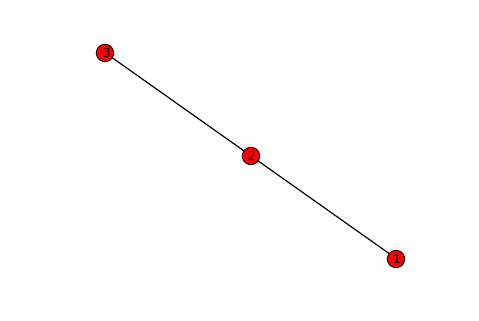

In [43]:
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)

# NB draw is not a method of the Graph class, we pass a Graph to draw()
nx.draw(G)

As a short-hand for adding lots of nodes or edges, you can use `add_nodes_from` and `add_edges_from`.  The code below is equiuvalent to the code above.

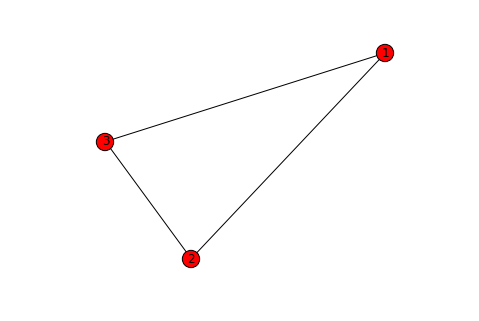

In [76]:
G=nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(2,3),(3,1)])
nx.draw(G)

Remember how we said that the vertex (or node) set of a graph V can be any kind of thing we want?  E.g., it doesn't have to be numbers, it can be letters.  NetworkX reflects this by letting you use just about any Python object as a vertex.  For example, here I use strings:

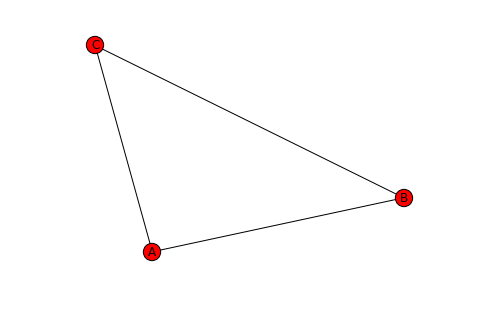

In [52]:
G=nx.Graph()
G.add_nodes_from(["A","B","C"])
G.add_edges_from([("A","B"),("B","C"),("C","A")])

nx.draw(G)

If you just want a graph to play around with to test something out, you don't have to build it up manually, NetworkX comes with lots of interesting graph generators.  E.g. if you want a graph where every vertex is connected to every other vertex (a very *dense* graph), you can use the `complete_graph` function:

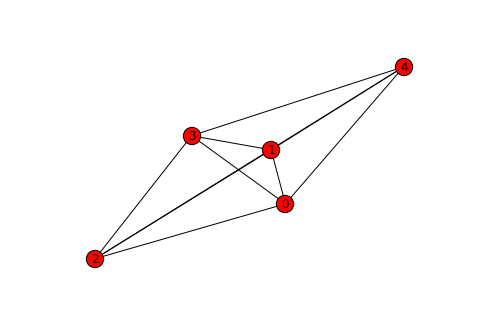

In [46]:
G=nx.complete_graph(5)
nx.draw(G)

There are lots of different algorithms for building interesting random graphs, but I don't think you'll meet any of them in this class.  Maybe the most basic one NetworkX supports is the "random gnp graph".  This lets you specify a number of vertices/nodes (n) and a probability that two vertices are connected.

Let's make a random graph with 20 vertices and an edge probability of 0.33:

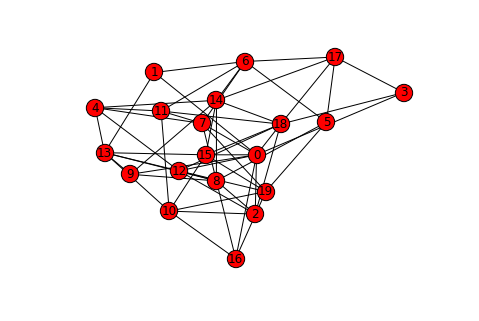

In [47]:
G=nx.fast_gnp_random_graph(20,0.33)
nx.draw(G)

If we make the edge probability very low, the graph gets quite sparse, and if we bring the probability close to 1.0, the graph gets very dense, e.g.:

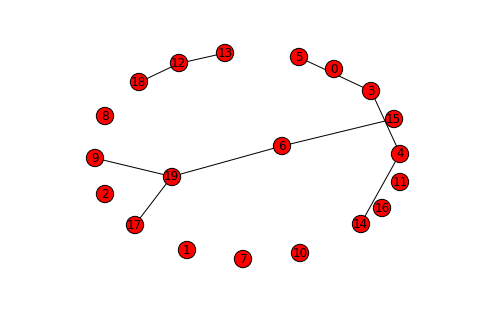

In [48]:
sparse_G=nx.fast_gnp_random_graph(20,0.05)
nx.draw(sparse_G)

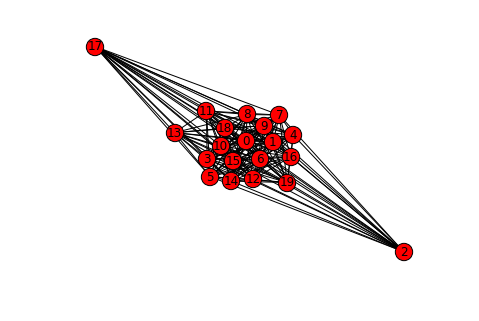

In [49]:
dense_G=nx.fast_gnp_random_graph(20,0.95)
nx.draw(dense_G)

So, we can build graphs with NetworkX, of all different kinds.  What else can we do?

Remember our basic graph definitions from Lecture 10?  We learned that:
* The number of edges in a graph is its *order*
* The number of vertices in a graph is its *size*
* The distance between two nodes is the length of the shortest path between them (in an unweighted graph)
* Distance can be used to define things like radius and diameter

NetworkX provides ways of computing all of these things:

This graph has order: 10
This graph has size: 9
This graph has diameter: 6
This graph has radius: 3


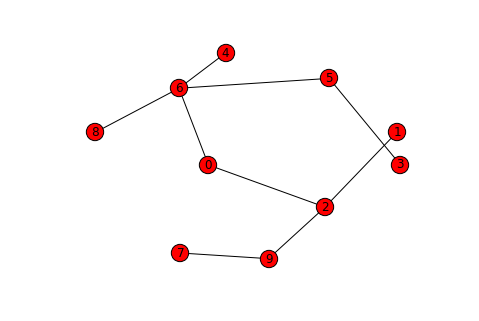

In [50]:
from networkx.algorithms.distance_measures import diameter, radius
G = nx.fast_gnp_random_graph(10, 0.3)
nx.draw(G)
print("This graph has order: %d" % G.order())
print("This graph has size: %d" % G.size())
print("This graph has diameter: %d" % diameter(G))
print("This graph has radius: %d" % radius(G))

So far all our NetworkX graphs have been undirected graphs.  This course is actually supposed to take a digraph-centric perspective!  Thankfully, NetworkX has us covered with a `DiGraph` class.  It works very much like the `Graph` class.  The arrows are kind of ugly, though.

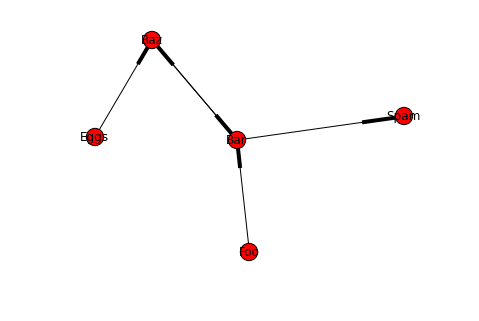

In [54]:
G=nx.DiGraph()
G.add_nodes_from(["Foo","Bar", "Baz", "Spam", "Eggs"])
G.add_edges_from([("Foo","Bar"),
                  ("Bar","Baz"),
                  ("Baz","Bar"),
                  ("Bar","Spam"),
                  ("Eggs","Baz")])
nx.draw(G)

What about weighted graphs?  NetworkX can handle those too, using the `add_weighted_edges_from` method.  Unfortunately the weights don't show up on graphs by default. :(

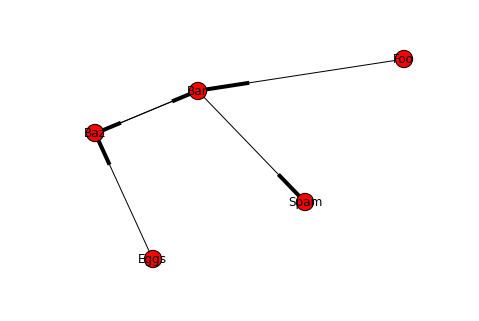

In [57]:
G=nx.DiGraph()
G.add_nodes_from(["Foo","Bar", "Baz", "Spam", "Eggs"])
G.add_weighted_edges_from([("Foo","Bar",4.2),
                  ("Bar","Baz",1),
                  ("Baz","Bar",17),
                  ("Bar","Spam",2),
                  ("Eggs","Baz",3.141529)])
nx.draw(G)

Okay, so NetworkX implements all the basic graph definitions and concepts we learned about in Lecture 10.  Let's see how we can use it to actually do something interesting...

Let's create a weighted undirected graph which roughly corresponds to a map of Auckland suburbs:

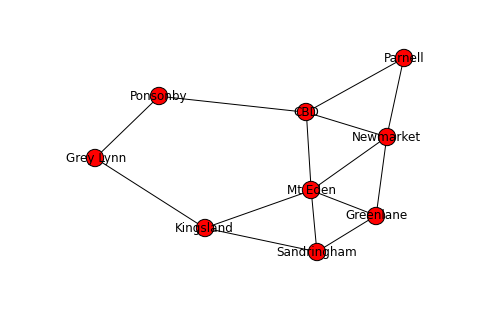

In [122]:
suburb_graph = nx.Graph()
suburb_graph.add_nodes_from(["CBD","Mt Eden","Ponsonby","Parnell",
                             "Grey Lynn","Sandringham","Greenlane"])
# Distances stolen from Google Maps (in km, walking)
suburb_graph.add_weighted_edges_from([
        ("Mt Eden", "Newmarket",1.4),
        ("Mt Eden", "CBD",4.0),
        ("Mt Eden", "Kingsland",2.1),
        ("Mt Eden", "Sandringham",3.8),
        ("Parnell", "Newmarket",2.0),
        ("Parnell", "CBD",1.8),
        ("Ponsonby", "CBD",1.8),
        ("Newmarket", "CBD",3.5),
        ("Grey Lynn", "Kingsland",1.4),
        ("Grey Lynn", "Ponsonby",2.5),
        ("Kingsland", "Sandringham",1.8),
        ("Greenlane", "Sandringham",5.2),
        ("Greenlane", "Newmarket",3.1),
        ("Greenlane", "Mt Eden",4.4),
    ])
nx.draw(suburb_graph)

Suppose I want to walk from Newmarket to Kingsland.  What paths are available to me?

NetworkX can find all possible paths between two vertices:

In [123]:
source="Parnell"
target="Ponsonby"
for path in nx.all_simple_paths(suburb_graph,source,target):
    print(path)

['Parnell', 'Newmarket', 'Greenlane', 'Mt Eden', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Greenlane', 'Mt Eden', 'Sandringham', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Greenlane', 'Mt Eden', 'CBD', 'Ponsonby']
['Parnell', 'Newmarket', 'Greenlane', 'Sandringham', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Greenlane', 'Sandringham', 'Kingsland', 'Mt Eden', 'CBD', 'Ponsonby']
['Parnell', 'Newmarket', 'Greenlane', 'Sandringham', 'Mt Eden', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Greenlane', 'Sandringham', 'Mt Eden', 'CBD', 'Ponsonby']
['Parnell', 'Newmarket', 'Mt Eden', 'Greenlane', 'Sandringham', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Mt Eden', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Mt Eden', 'Sandringham', 'Kingsland', 'Grey Lynn', 'Ponsonby']
['Parnell', 'Newmarket', 'Mt Eden', 'CBD', 'Ponsonby']
['Parnell', 'Newmarket', 'CBD', 'Mt Eden', 'Greenla

Whoa, that's quite a few paths!  What if I want the *shortest* path?

In [124]:
print(nx.shortest_path(suburb_graph,source,target))

['Parnell', 'CBD', 'Ponsonby']


That's nice and easy.  What if I don't want to go through the CBD because it's too crowded?  Well, I can solve the path problem on an *induced subgraph* which excludes the CBD.

['Parnell', 'Newmarket', 'Mt Eden', 'Kingsland', 'Grey Lynn', 'Ponsonby']


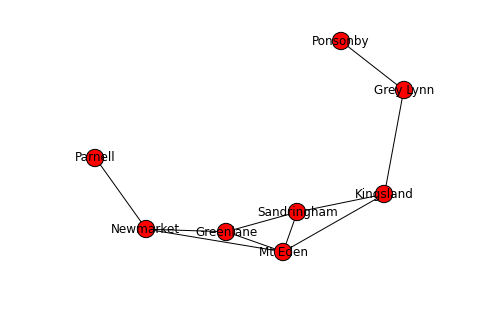

In [125]:
all_suburbs = set(suburb_graph.nodes())
suburbs_to_avoid = set(["CBD"])
happy_subset = all_suburbs - suburbs_to_avoid
induced_subgraph = suburb_graph.subgraph(happy_subset)
nx.draw(induced_subgraph)
print(nx.shortest_path(induced_subgraph, source, target))

Nifty!  We're ready to take on Google Maps!

NetworkX computes the shortest path between two vertices using something called a Breadth First Search (BFS), which is a kind of Graph Traversal Algorithm.  You will learn all about how this works with Simone next week.

BFS traversals visit every node in a graph, starting from some initial point and spreading out.  First you get all the neighbours of your starting point, then the neighbours of the neighbours, etc.  E.g. here is a BFS search of our Auckland suburb graph starting from Mt Eden:

In [90]:
for suburb in nx.bfs_edges(suburb_graph,"Mt Eden"):
    # We only want the endpoint of edges
    print(suburb[1])

Kingsland
Newmarket
CBD
Grey Lynn
Parnell
Ponsonby


What is this useful for?  Well, suppose we also have a database of cafes in each suburb:

In [109]:
cafe_dict = {
    "CBD" : ["Baristacats", "Craven A's", "La Noisette"]
    "Mt Eden" : ["Fraser's","Olaf's","RAD"],
    "Kingsland" : ["Fridge"],
    "Newmarket" : ["Little & Friday's","Zarbo's"],
    "Parnell" : ["Cafe Rhythm", "Mink Cafe"]
}

Now we can easily build lists of cafes in order of how close they are to us:

In [126]:
def cafes_near_you(where_youre_at):
    cafes = []
    if where_youre_at in cafe_dict:
        cafes.extend(cafe_dict[where_youre_at])
    for (noise, suburb) in nx.bfs_edges(suburb_graph,where_youre_at):
        if suburb in cafe_dict:
            cafes.extend(cafe_dict[suburb])
    return cafes

for suburb in ("Newmarket", "Kingsland"):
    print("Cafes near %s:" % suburb )
    print("----------")
    for cafe in cafes_near_you(suburb):
        print(cafe)
    print("")

Cafes near Newmarket:
----------
Little & Friday's
Zarbo's
Fraser's
Olaf's
RAD
Cafe Rhythm
Fridge

Cafes near Kingsland:
----------
Fridge
Fraser's
Olaf's
RAD
Little & Friday's
Zarbo's
Cafe Rhythm



Way cool, now we can destroy Yelp and Zomato once we've finished burying Google Maps!  BFS graph traversal sure is handy.

(I did this with a dictionary of cafe data above to hopefully make it clear and accessible, but if you were going to seriously try to develop something like this, remember that NetworkX lets you use just about anything as a graph node.  You could define a `Suburb` class with a `cafes` attribute and build the graph out of those directly, which would be a bit more elegant and extensible)

Of course, these companies don't use graphs defined over suburbs, they use graphs over intersections, or maybe city blocks, so there are a lot more nodes.  How does this stuff scale, anyway?

Let's do a very "rough and ready" experiment to investigate the time complexity of finding the shortest path.

In [ ]:
import math
import random
import time

def time_shortest_path(order):
    start_time = time.time()
    # Make 100 random graphs
    for i in range(1,100):
        # Vary the density
        p = max(random.random(),0.2)
        G = nx.fast_gnp_random_graph(order, p)
        # Pick 10 random paths
        for j in range(1,10):
            while True:
                source, target = random.sample(G.nodes(),2)
                if nx.has_path(G,source,target):
                    break
            nx.shortest_path(G,source,target)
    end_time = time.time()
    run_time = (end_time - start_time)
    return run_time

n=25
old_time = time_shortest_path(n)
old_lin, old_loglin, old_quad = n, n*math.log(n), n*n
print("\t".join(["n","run time", "increase","linear","linearithmic","quadratic"]))
print("\t".join(["25",str(old_time), "N/A", "N/A", "N/A", "N/A"]))
for i in range(1,10):
    n = 25*2**i
    new_time = time_shortest_path(n)
    new_lin, new_loglin, new_quad = n, n*math.log(n), n*n
    print("\t".join(map(str,[n, new_time, new_time/old_time,
                             new_lin/old_lin,
                            new_loglin/old_loglin,
                            new_quad/old_quad])))
    old_time, old_lin, old_loglin, old_quad = new_time, new_lin, new_loglin, new_quad

n	run time	increase	linear	linearithmic	quadratic
25	0.0469009876251	N/A	N/A	N/A	N/A
50	0.0949649810791	2.02479704347	2	2.43067655807	4
100	0.385728120804	4.06179326759	2	2.35436764027	4
200	1.48230600357	3.84287772559	2	2.30102999566	4
400	6.77852082253	4.57295646526	2	2.2616480413	4
